# Instalando o Pycaret

In [43]:
#!pip install pycaret

In [44]:
#!pip install scipy

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
from pycaret.regression import *
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.cluster import KMeans 
from sklearn.feature_extraction import FeatureHasher
import sweetviz as sv
import seaborn as sns

# Tratando a base

In [163]:
df= pd.read_excel("Base_2022_2023.xlsx")

In [164]:
#pegado os municipios abaixo de 50 mil habitantes 
df = df.loc[df['porte_municipio'] == 1]
df

cod_municipio_ibge SGUF                    NMMUN  qtd_ativas  \
2                 110003   RO                   Cabixi         384   
6                 110007   RO               Corumbiara         437   
18                110026   RO               Rio Crespo         153   
20                110029   RO      Santa Luzia D'Oeste         338   
28                110050   RO  Novo Horizonte do Oeste         341   
...                  ...  ...                      ...         ...   
5562              522180   GO                   Urutaí         250   
5564              522190   GO                   Varjão         229   
5566              522205   GO           Vicentinópolis         597   
5567              522220   GO                 Vila Boa         239   
5568              522230   GO            Vila Propício         356   

      qtd_ativas_Consórcio de Sociedades  qtd_ativas_Consórcio Simples  \
2                                    NaN                           NaN   
6                                    NaN                           NaN   
18                                   NaN                           NaN   
20                                   NaN                           NaN   
28                                   NaN                           NaN   
...                                  ...                           ...   
5562                                 NaN                           NaN   
5564                                 NaN                           NaN   
5566                                 NaN                           NaN   
5567                                 NaN                           NaN   
5568                                 NaN                           NaN   

      qtd_ativas_Cooperativa  qtd_ativas_EIRELI  qtd_ativas_Empresa Pública  \
2                        3.0                NaN                         1.0   
6                        2.0                NaN                         1.0   
18                       4.0                NaN                         1.0   
20                       1.0                NaN                         1.0   
28                       4.0                NaN                         1.0   
...                      ...                ...                         ...   
5562                     2.0                NaN                         1.0   
5564                     5.0                NaN                         1.0   
5566                     2.0                NaN                         1.0   
5567                     6.0                NaN                         1.0   
5568                     NaN                NaN                         2.0   

      qtd_ativas_Empresário Individual  \
2                                  295   
6                                  338   
18                                  99   
20                                 228   
28                                 206   
...                                ...   
5562                               176   
5564                               165   
5566                               366   
5567                               128   
5568                               227   

      qtd_ativas_Estabelecimento, no Brasil, de Sociedade Estrangeira e Empresas Binacionais  \
2                                                   NaN                                        
6                                                   NaN                                        
18                                                  NaN                                        
20                                                  NaN                                        
28                                                  NaN                                        
...                                                 ...                                        
5562                                                NaN                                        
5564                                                Na

In [165]:
#Retirando o que não é compativel com a base de 2019

#df.drop([303,3173,4398], inplace = True)

In [166]:
#pd.set_option('display.max_columns', None)

In [167]:
#Excluir Rio e SP

#df.drop([3242,3829], inplace = True)

In [168]:
df_mun = df[['cod_municipio_ibge','SGUF','NMMUN']]

In [169]:
df = df[['cod_municipio_ibge','qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [170]:
#'pop_total'

In [171]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [172]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [173]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [174]:
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [175]:
df = df[np.isfinite(df).all(1)]

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2451 entries, 2 to 5568
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_municipio_ibge                 2451 non-null   int64  
 1   qtd_abertas_Empresario_Individual  2451 non-null   int64  
 2   taxa_homicidio                     2451 non-null   float64
 3   RH_adm_dir                         2451 non-null   float64
 4   densidade_banda_larga              2451 non-null   float64
 5   densidade_telefonia_movel          2451 non-null   float64
 6   qtd_cursos_engenharias             2451 non-null   float64
 7   qtd_cursos_negocios_direito        2451 non-null   float64
 8   media_notas_CN                     2451 non-null   float64
 9   media_notas_CH                     2451 non-null   float64
 10  media_NU_NOTA_LC                   2451 non-null   float64
 11  media_NU_NOTA_MT                   2451 non-null   float

In [177]:
df = df.set_index('cod_municipio_ibge')

In [106]:
# Matriz de correlação
#plt.figure(figsize=(30, 20))
#sns.heatmap(df.corr(), annot=True)
#plt.show()

## Nova base teste

In [18]:
df_2 = pd.read_excel("Base_novos_dados_2018_2019.xlsx")

In [19]:
#pegado os municipios abaixo de 50 mil habitantes 
df_2 = df_2.loc[df_2['porte_municipio'] >= 3]
df_2

cod_municipio_ibge SGUF                        NMMUN  qtd_abertas  \
1                 110002   RO                    Ariquemes         1294   
3                 110004   RO                       Cacoal         1270   
10                110011   RO                         Jaru          556   
11                110012   RO                    Ji-Paraná         2025   
16                110020   RO                  Porto Velho         6350   
...                  ...  ...                          ...          ...   
5535              521975   GO  Santo Antônio do Descoberto          583   
5546              522045   GO               Senador Canedo         2608   
5555              522140   GO                     Trindade         2214   
5563              522185   GO          Valparaíso de Goiás         2786   
5569              530010   DF                     Brasília        61413   

      qtd_abertas_Consórcio de Sociedades  qtd_abertas_Cooperativa  \
1                                     NaN                      4.0   
3                                     NaN                      3.0   
10                                    NaN                      2.0   
11                                    NaN                      3.0   
16                                    NaN                     11.0   
...                                   ...                      ...   
5535                                  NaN                      NaN   
5546                                  NaN                      1.0   
5555                                  NaN                      NaN   
5563                                  NaN                      NaN   
5569                                 44.0                     25.0   

      qtd_abertas_EIRELI  qtd_abertas_Empresa Pública  \
1                   13.0                          NaN   
3                   13.0                          NaN   
10                   7.0                          1.0   
11                  13.0                          NaN   
16                  56.0                          NaN   
...                  ...                          ...   
5535                 7.0                          NaN   
5546                29.0                          NaN   
5555                30.0                          NaN   
5563                26.0                          NaN   
5569               885.0                          2.0   

      qtd_abertas_Empresario_Individual  \
1                                  1058   
3                                   987   
10                                  446   
11                                 1622   
16                                 5110   
...                                 ...   
5535                                510   
5546                               1978   
5555                               1855   
5563                               2320   
5569                              47504   

      qtd_abertas_Estabelecimento, no Brasil, de Sociedade Estrangeira e Empresas Binacionais  \
1                                                   NaN                                         
3                                                   NaN                                         
10                                                  NaN                                         
11                                                  NaN                                         
16                                                  NaN                                         
...                                                 ...                                         
5535                                                NaN                                         
5546                                                NaN                                         
5555                                                NaN                                         
5563                                                NaN                                     

In [20]:
#apagando o Rio e SP

#df_2.drop([3242,3829], inplace = True)

In [21]:
#apagando o Rio e SP

#df_2.drop([303,3173,4398], inplace = True)

In [22]:
df_2 = df_2[['cod_municipio_ibge','qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','total_sim_tecnologia','porte_municipio']]

In [23]:
df_2['qtd_cursos_engenharias'] = df_2['qtd_cursos_engenharias'].fillna(0)

df_2['qtd_cursos_negocios_direito'] = df_2['qtd_cursos_negocios_direito'].fillna(0)

df_2['total_sim_tecnologia'] = df_2['total_sim_tecnologia'].fillna(0)

df_2['taxa_homicidio'] = df_2['taxa_homicidio'].fillna(0)

df_2['RH_adm_dir'] = df_2['RH_adm_dir'].fillna(0)

In [24]:
df_2[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df_2[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [25]:
df_2[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df_2[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [26]:
df_2 = pd.get_dummies(df_2, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [27]:
df_2 = df_2[np.isfinite(df_2).all(1)]

In [28]:
df_2 = df_2.set_index('cod_municipio_ibge')

In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 110002 to 530010
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  666 non-null    int64  
 1   taxa_homicidio                     666 non-null    float64
 2   RH_adm_dir                         666 non-null    float64
 3   densidade_banda_larga              666 non-null    float64
 4   densidade_telefonia_movel          666 non-null    float64
 5   qtd_cursos_engenharias             666 non-null    float64
 6   qtd_cursos_negocios_direito        666 non-null    float64
 7   media_notas_CN                     666 non-null    float64
 8   media_notas_CH                     666 non-null    float64
 9   media_NU_NOTA_LC                   666 non-null    float64
 10  media_NU_NOTA_MT                   666 non-null    float64
 11  media_NU_NOTA_REDACAO              666 non-null   

# Dividindo em treino e test

Adaleny, fiz a divisão de treino e teste baseado na estratificação

In [212]:
treino = df.groupby('porte_municipio', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state = 123))

teste = df.drop(treino.index)

print(treino.shape, teste.shape)

(1838, 31) (613, 31)


In [213]:
treino = treino.drop('porte_municipio', axis = 1)
teste= teste.drop('porte_municipio', axis = 1)

treino = treino.drop('porte_municipio', axis = 1)
teste= teste.drop('porte_municipio', axis = 1)

In [214]:
teste_1 = teste.drop('qtd_abertas_Empresario_Individual', axis = 1)

In [215]:
#mun_mais = df.merge(df_2, on=['NMMUN', 'NMMUN'], how='outer', suffixes=['', '_'], indicator=True)

# Pycaret

## Setup

In [181]:
regression_setup = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

## Comparando Modelos 

### Usando RMSE

In [182]:
best_model = compare_models(sort = 'RMSE', fold= 5)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [183]:
# verificando os hiperparâmetros do modelo 

print(best_model)

ExtraTreesRegressor(n_jobs=-1, random_state=42)


In [191]:
best_model = create_model('rf', fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotando alguns graficos 

In [192]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [193]:
#plot_model(best_model, plot = 'learning')

In [194]:
#plot_model(best_model, plot='vc')

In [195]:
#plot_model(best_model, plot='error')

In [196]:
#plot_model(best_model, plot='feature')

In [197]:
#plot_model(best_model, plot='residuals',  scale = 3)

### Tunando o modelo

In [198]:
 tuned = tune_model(best_model, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [145]:
print(tuned)

RandomForestRegressor(n_jobs=-1, random_state=42)


In [38]:
#plot_model(tuned, plot = 'learning')  #use_train_data = True

In [39]:
# Validation Curve
#plot_model(tuned, plot='vc')


In [40]:
#plot_model(tuned, plot='error')


In [60]:
#plot_model(tuned, plot='feature' )

In [42]:
#plot_model(tuned, plot='feature', save = True )

In [43]:
#plot_model(tuned, plot='residuals',  scale = 3)

In [199]:
final_model_baseline = finalize_model(best_model)

### Previsão

In [200]:
pred_treino = predict_model(final_model_baseline, data = treino)

In [201]:
pred_treino

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
270660                         6.0         0.0               0.463208   
316730                         0.0       186.0              12.130569   
251278                         0.0       260.0               8.554277   
430870                         0.0       226.0              30.952818   
314920                         0.0       369.0               5.450562   
...                            ...         ...                    ...   
110146                         0.0       316.0               5.030560   
420945                         0.0       147.0              17.542614   
421535                         0.0       185.0              22.430910   
421230                         0.0       343.0              46.283695   
220253                         1.0       272.0               7.986464   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
270660                              33.152462                     0.0   
316730                              67.534187                     0.0   
251278                              66.133064                     0.0   
430870                              88.121902                     0.0   
314920                              94.467270                     0.0   
...                                       ...                     ...   
110146                              92.994827                     0.0   
420945                             139.133530                     0.0   
421535                              71.049103                     0.0   
421230                              76.864693                     0.0   
220253                              34.145515                     0.0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
270660                                      0.0      395.628571   
316730                                      0.0      490.662506   
251278                                      0.0      444.866669   
430870                                      0.0      488.318176   
314920                                      0.0      469.000000   
...                                         ...             ...   
110146                                      0.0      428.450012   
420945                                      0.0      456.519989   
421535                                      0.0      504.883331   
421230                                      0.0      501.750000   
220253                                      0.0      456.519989   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
270660                  422.762512        445.825012        436.742859  ...   
316730                  527.674988        496.262512        539.212524  ...   
251278                  473.833344        443.799988        451.933319  ...   
430870                  497.261536        469.307678        565.990906  ...   
314920                  452.000000        449.950012        554.099976  ...   
...                            ...               ...               ...  ...   
110146                  449.399994        400.125000        449.500000  ...   
420945                  459.600006        448.600006        487.174988  ...   
421535                  524.908325        491.008331        539.766663  ...   
421230                  507.833344        471.066681        534.599976  ...   
220253                  476.552765        464.447815        487.174988  ...   

                    Isencao_Tx_Sim  Cessao_terrenos_Sim  Doacao_terrenos_Sim  \
cod_municipio_ibge                                                             
270660                           0                    0     

Text(0, 0.5, 'Valores preditos')

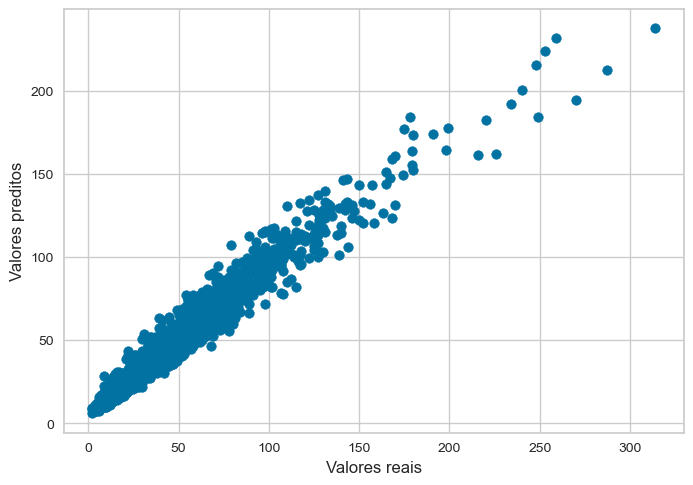

In [202]:
plt.scatter(pred_treino['qtd_abertas_Empresario_Individual'],pred_treino['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')

Previsão de dados não vistos

In [216]:
pred_unseen = predict_model(final_model_baseline, data = teste_1)

In [204]:
pd.set_option('display.max_columns', None)

In [217]:
pred_unseen

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110007                         1.0       382.0               3.261486   
110029                         2.0       411.0               4.207337   
110090                         0.0       288.0              12.829285   
110120                         3.0       348.0              12.694219   
110155                         1.0       244.0               7.620193   
...                            ...         ...                    ...   
521950                         0.0       188.0               2.454545   
522100                         5.0       195.0               2.852253   
522119                         4.0       271.0              10.329089   
522190                         0.0       184.0               9.433472   
522230                         0.0       344.0               7.187342   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110007                              51.545662                     0.0   
110029                              88.909454                     0.0   
110090                              74.238792                     0.0   
110120                              54.645386                     0.0   
110155                              89.711540                     0.0   
...                                       ...                     ...   
521950                             135.863632                     0.0   
522100                             103.565315                     0.0   
522119                             116.298340                     0.0   
522190                              78.092514                     0.0   
522230                              39.892273                     0.0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110007                                      0.0      439.184601   
110029                                      0.0      478.235718   
110090                                      0.0      462.416656   
110120                                      0.0      460.247620   
110155                                      0.0      439.540009   
...                                         ...             ...   
521950                                      0.0      432.433319   
522100                                      0.0      464.779999   
522119                                      0.0      435.885712   
522190                                      0.0      426.950012   
522230                                      0.0      432.055542   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  \
cod_municipio_ibge                                                       
110007                  466.414276        432.535706        445.276917   
110029                  509.885712        475.578583        487.942871   
110090                  469.366669        439.100006        482.500000   
110120                  464.156006        429.712006        477.971436   
110155                  477.612488        442.662506        456.466675   
...                            ...               ...               ...   
521950                  528.766663        460.577789        488.311096   
522100                  487.066681        474.000000        520.359985   
522119                  480.299988        450.257141        503.938110   
522190                  483.766663        451.266663        422.950012   
522230                  417.394745        428.821045        460.816681   

                    media_NU_NOTA_REDACAO  valor_medio_recebido_familia  \
cod_municipio_ibge                                                        
110007                         577.142883                         17512   
110029                         597.142883                   

In [218]:
col_empr = teste['qtd_abertas_Empresario_Individual']
display(col_empr)
  
pred_unseen = pred_unseen.join(col_empr)

cod_municipio_ibge
110007     86
110029     33
110090     22
110120     29
110155     21
         ... 
521950     16
522100     41
522119    108
522190     30
522230     47
Name: qtd_abertas_Empresario_Individual, Length: 613, dtype: int64

In [219]:
pred_unseen

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110007                         1.0       382.0               3.261486   
110029                         2.0       411.0               4.207337   
110090                         0.0       288.0              12.829285   
110120                         3.0       348.0              12.694219   
110155                         1.0       244.0               7.620193   
...                            ...         ...                    ...   
521950                         0.0       188.0               2.454545   
522100                         5.0       195.0               2.852253   
522119                         4.0       271.0              10.329089   
522190                         0.0       184.0               9.433472   
522230                         0.0       344.0               7.187342   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110007                              51.545662                     0.0   
110029                              88.909454                     0.0   
110090                              74.238792                     0.0   
110120                              54.645386                     0.0   
110155                              89.711540                     0.0   
...                                       ...                     ...   
521950                             135.863632                     0.0   
522100                             103.565315                     0.0   
522119                             116.298340                     0.0   
522190                              78.092514                     0.0   
522230                              39.892273                     0.0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110007                                      0.0      439.184601   
110029                                      0.0      478.235718   
110090                                      0.0      462.416656   
110120                                      0.0      460.247620   
110155                                      0.0      439.540009   
...                                         ...             ...   
521950                                      0.0      432.433319   
522100                                      0.0      464.779999   
522119                                      0.0      435.885712   
522190                                      0.0      426.950012   
522230                                      0.0      432.055542   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  \
cod_municipio_ibge                                                       
110007                  466.414276        432.535706        445.276917   
110029                  509.885712        475.578583        487.942871   
110090                  469.366669        439.100006        482.500000   
110120                  464.156006        429.712006        477.971436   
110155                  477.612488        442.662506        456.466675   
...                            ...               ...               ...   
521950                  528.766663        460.577789        488.311096   
522100                  487.066681        474.000000        520.359985   
522119                  480.299988        450.257141        503.938110   
522190                  483.766663        451.266663        422.950012   
522230                  417.394745        428.821045        460.816681   

                    media_NU_NOTA_REDACAO  valor_medio_recebido_familia  \
cod_municipio_ibge                                                        
110007                         577.142883                         17512   
110029                         597.142883                   

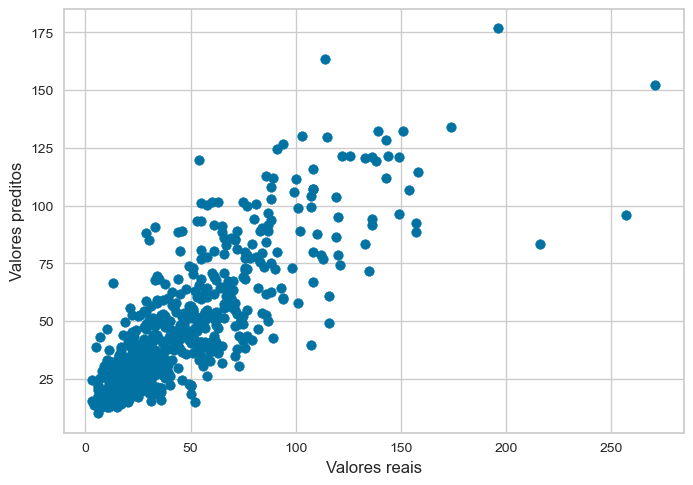

In [220]:
plt.scatter(pred_unseen['qtd_abertas_Empresario_Individual'],pred_unseen['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.show()
#plt.savefig('previsao_2022.png')

## Previsão - Novos dados (VIs = 2018 e VD = 2019) 

In [198]:
pred_treino_2 = predict_model(final_model_baseline, data = df_2)

In [199]:
pred_treino_2

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110001                         7.0       926.0               5.391153   
110003                         0.0       344.0               3.990964   
110005                         2.0       591.0               7.847822   
110006                         2.0       641.0               7.933510   
110007                         3.0       382.0               3.693681   
...                            ...         ...                    ...   
522190                         0.0       184.0               1.776849   
522200                         2.0       528.0               7.191805   
522205                         4.0       394.0               8.601167   
522220                         3.0       403.0               5.055907   
522230                         2.0       344.0               2.817385   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110001                              34.342995                     6.0   
110003                              79.838104                     0.0   
110005                              89.952827                     0.0   
110006                             102.348572                     9.0   
110007                              58.205925                     0.0   
...                                       ...                     ...   
522190                              73.556313                     0.0   
522200                              33.744499                     0.0   
522205                              78.874527                     0.0   
522220                               5.833738                     0.0   
522230                              26.473114                     0.0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110001                                     23.0      480.664276   
110003                                      0.0      442.604156   
110005                                     38.0      466.433807   
110006                                     16.0      487.917328   
110007                                      0.0      452.132141   
...                                         ...             ...   
522190                                      0.0      485.731995   
522200                                      0.0      474.571777   
522205                                      0.0      439.651611   
522220                                      0.0      440.164276   
522230                                      0.0      451.296661   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
110001                  543.020264        495.929718        502.991425  ...   
110003                  506.685181        466.007416        484.924988  ...   
110005                  551.494751        498.394745        493.949310  ...   
110006                  543.544556        511.046906        525.177246  ...   
110007                  521.396790        473.606445        502.000000  ...   
...                            ...               ...               ...  ...   
522190                  530.151978        512.495972        514.208008  ...   
522200                  522.414612        493.386505        503.091766  ...   
522205                  498.125641        463.625641        479.803223  ...   
522220                  513.099976        450.394440        504.899994  ...   
522230                  498.101593        463.396820        471.051666  ...   

                    Isencao_Tx_Sim  Cessao_terrenos_Sim  Doacao_terrenos_Sim  \
cod_municipio_ibge                                                             
110001                           0                    0     

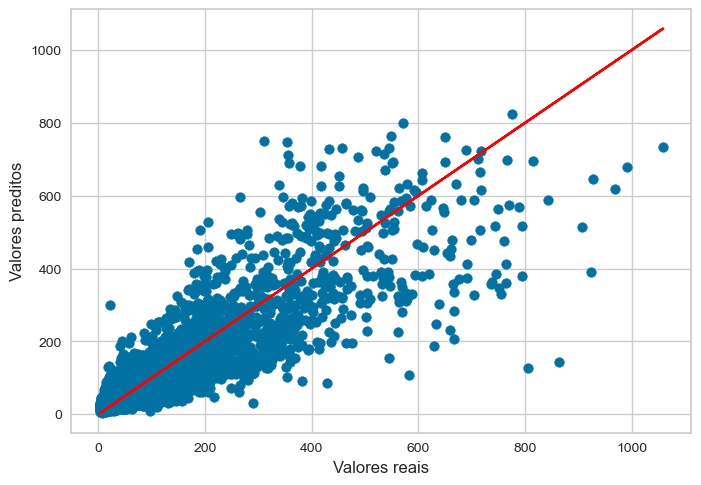

In [200]:
plt.scatter(pred_treino_2['qtd_abertas_Empresario_Individual'],pred_treino_2['prediction_label'])
plt.plot(pred_treino_2['qtd_abertas_Empresario_Individual'],pred_treino_2['qtd_abertas_Empresario_Individual'], color ="red")
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.grid (True)
#plt.savefig('previsao_2019.png')

In [231]:
#df.to_excel('dados_previsao.xlsx')

## Testando Radom Forest

### MAPE

In [156]:
regression_setup = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

In [157]:
best_model_mape = compare_models(sort = 'MAPE', fold=5)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [158]:
print(best_model_mape)

RandomForestRegressor(n_jobs=-1, random_state=42)


In [159]:
best_model_mape = create_model('rf', fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [160]:
tuned_mape = tune_model(best_model_mape, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


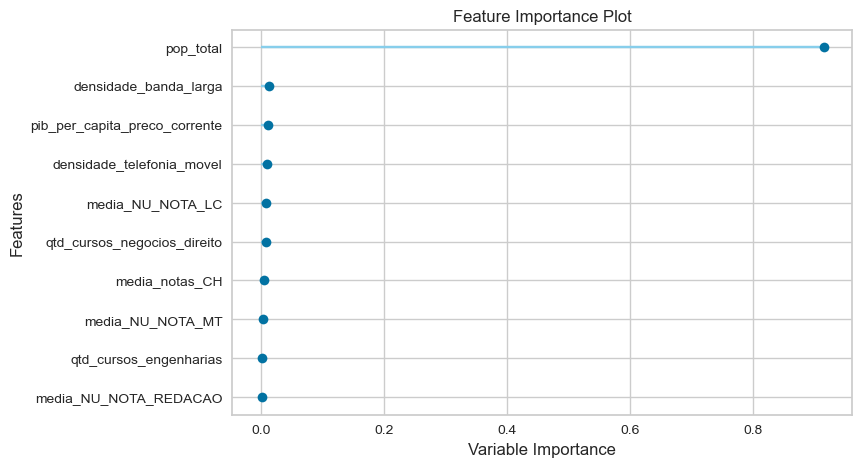

In [161]:
plot_model(best_model_mape, plot='feature' )

In [162]:
final_model_baseline_mape = finalize_model(best_model_mape)

In [163]:
pred_teste_mape= predict_model(final_model_baseline_mape, data = teste)

In [104]:
pred_teste_mape

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110005                         3.0       591.0               8.540527   
110007                         1.0       382.0               3.261486   
110008                         3.0       573.0               4.388471   
110011                        10.0      1484.0              20.346228   
110013                         6.0      1214.0               7.779695   
...                            ...         ...                    ...   
522100                         5.0       195.0               2.852253   
522119                         4.0       271.0              10.329089   
522190                         0.0       184.0               9.433472   
522200                         1.0       528.0               6.423907   
522230                         0.0       344.0               7.187342   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110005                             108.074341                     4.0   
110007                              51.545662                     0.0   
110008                              35.367435                     5.0   
110011                             101.132721                     8.0   
110013                              56.914486                     3.0   
...                                       ...                     ...   
522100                             103.565315                     0.0   
522119                             116.298340                     0.0   
522190                              78.092514                     0.0   
522200                             106.821411                     4.0   
522230                              39.892273                     0.0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110005                                     35.0      479.268738   
110007                                      0.0      439.184601   
110008                                     12.0      438.418182   
110011                                    114.0      472.343292   
110013                                     26.0      460.839630   
...                                         ...             ...   
522100                                      0.0      464.779999   
522119                                      0.0      435.885712   
522190                                      0.0      426.950012   
522200                                     12.0      449.954041   
522230                                      0.0      432.055542   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
110005                  477.045715        454.722870        480.696869  ...   
110007                  466.414276        432.535706        445.276917  ...   
110008                  465.692108        451.828949        478.290924  ...   
110011                  501.169189        481.437683        507.111206  ...   
110013                  482.138611        470.749115        485.543396  ...   
...                            ...               ...               ...  ...   
522100                  487.066681        474.000000        520.359985  ...   
522119                  480.299988        450.257141        503.938110  ...   
522190                  483.766663        451.266663        422.950012  ...   
522200                  479.917084        473.014648        516.186462  ...   
522230                  417.394745        428.821045        460.816681  ...   

                    Isencao_Tx_Sim  Cessao_terrenos_Sim  Doacao_terrenos_Sim  \
cod_municipio_ibge                                                             
110005                           0                    0     

Text(0, 0.5, 'Valores preditos')

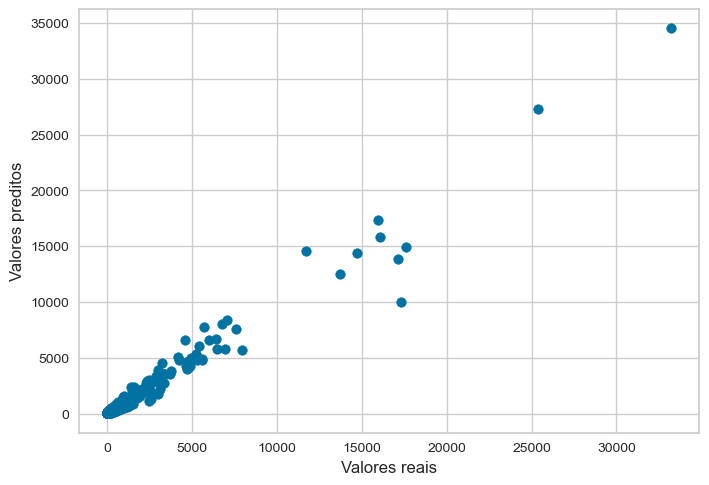

In [105]:
plt.scatter(pred_teste_mape['qtd_abertas_Empresario_Individual'],pred_teste_mape['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [ ]:
#pred_teste_mape.to_excel('previsao_mape.xlsx')

### Previsão - Mape 2019

In [106]:
pred_2018_2019 = predict_model(final_model_baseline_mape, data = df_2)

In [107]:
pred_2018_2019

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110001                         7.0       926.0               5.391153   
110002                        41.0      2563.0              11.445074   
110003                         0.0       344.0               3.990964   
110004                        17.0      1971.0              12.382995   
110005                         2.0       591.0               7.847822   
...                            ...         ...                    ...   
522200                         2.0       528.0               7.191805   
522205                         4.0       394.0               8.601167   
522220                         3.0       403.0               5.055907   
522230                         2.0       344.0               2.817385   
530010                       530.0    122197.0              23.930012   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110001                              34.342995                     6.0   
110002                              86.588539                    42.0   
110003                              79.838104                     0.0   
110004                              89.462151                   202.0   
110005                              89.952827                     0.0   
...                                       ...                     ...   
522200                              33.744499                     0.0   
522205                              78.874527                     0.0   
522220                               5.833738                     0.0   
522230                              26.473114                     0.0   
530010                             117.493172                  3082.0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110001                                     23.0      480.664276   
110002                                    299.0      481.314240   
110003                                      0.0      442.604156   
110004                                    469.0      484.990723   
110005                                     38.0      466.433807   
...                                         ...             ...   
522200                                      0.0      474.571777   
522205                                      0.0      439.651611   
522220                                      0.0      440.164276   
522230                                      0.0      451.296661   
530010                                  15811.0      510.176941   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
110001                  543.020264        495.929718        502.991425  ...   
110002                  549.247253        513.304749        512.975891  ...   
110003                  506.685181        466.007416        484.924988  ...   
110004                  549.739380        513.924805        524.946716  ...   
110005                  551.494751        498.394745        493.949310  ...   
...                            ...               ...               ...  ...   
522200                  522.414612        493.386505        503.091766  ...   
522205                  498.125641        463.625641        479.803223  ...   
522220                  513.099976        450.394440        504.899994  ...   
522230                  498.101593        463.396820        471.051666  ...   
530010                  580.567993        546.609680        552.578613  ...   

                    Isencao_Tx_Sim  Cessao_terrenos_Sim  Doacao_terrenos_Sim  \
cod_municipio_ibge                                                             
110001                           0                    0     

Text(0, 0.5, 'Valores preditos')

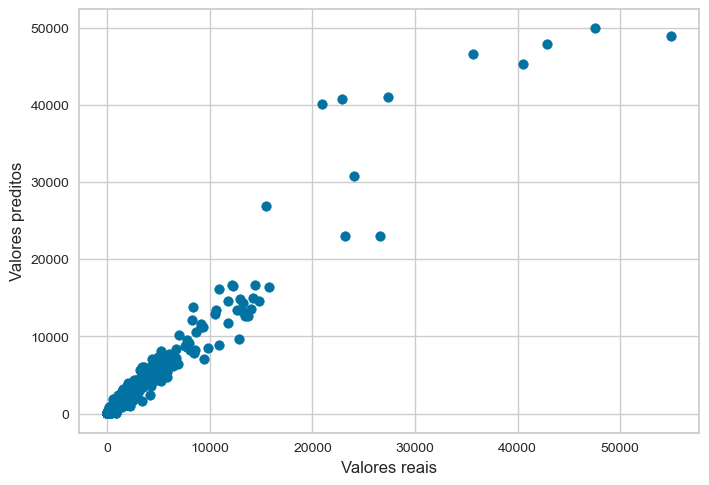

In [108]:
plt.scatter(pred_2018_2019['qtd_abertas_Empresario_Individual'],pred_2018_2019['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [ ]:
#pred_2018_2019.to_excel('previsao_mape_2018_2019.xlsx')

## Clusterização 

###  K-means 2022

In [622]:
df_c_22 = df

In [623]:
df_c_22 = df.drop('qtd_abertas_Empresario_Individual', axis = 1)

In [624]:
df_c_22.head()

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110001                         8.0       926.0               8.958074   
110002                        38.0      2563.0              21.363407   
110003                         0.0       344.0               5.407539   
110004                        21.0      1971.0              19.480189   
110005                         3.0       591.0               8.540527   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110001                              70.647540                     2.0   
110002                              93.858639                    99.0   
110003                              78.369844                     0.0   
110004                             105.350861                   184.0   
110005                             108.074341                     4.0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110001                                     30.0      497.721951   
110002                                    342.0      474.773986   
110003                                      0.0      477.266667   
110004                                    422.0      489.744000   
110005                                     35.0      479.268750   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  \
cod_municipio_ibge                                                       
110001                  504.034091        491.079545        543.558537   
110002                  495.727950        484.710248        518.811149   
110003                  486.071429        447.628571        522.883333   
110004                  505.006061        490.991919        533.458933   
110005                  477.045714        454.722857        480.696875   

                    media_NU_NOTA_REDACAO  valor_medio_recebido_familia  \
cod_municipio_ibge                                                        
110001                         621.363636                         18495   
110002                         584.534161                         17615   
110003                         471.428571                         18956   
110004                         611.717172                         19376   
110005                         576.571429                         17752   

                    pib_per_capita_preco_corrente  perc_20_59_anos  pop_total  \
cod_municipio_ibge                                                              
110001                                   25091.18         0.587227      22516   
110002                                   25730.20         0.591797     111148   
110003                                   32226.25         0.584567       5067   
110004                                   29331.29         0.595584      86416   
110005                                   37069.25         0.598272      16088   

                    total_sim_tecnologia  porte_municipio  \
cod_municipio_ibge                                          
110001                              18.0                2   
110002                              12.0                4   
110003                               8.0                1   
110004                              17.0                3   
110005                               8.0                2   

                    Mecanismos_incentivo_Sim  Reducao_IPTU_Sim  \
cod_municipio_ibge                                               
110001                                     0                 0   
110002                                     1                 1   
110003                                     1                 0   
110004                                     1                 0   
110005                                     1                 0   

                    Is

In [625]:
df_c_22 = df_c_22.astype('int64')

In [626]:
df_c_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 110001 to 530010
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   taxa_homicidio                 5570 non-null   int64
 1   RH_adm_dir                     5570 non-null   int64
 2   densidade_banda_larga          5570 non-null   int64
 3   densidade_telefonia_movel      5570 non-null   int64
 4   qtd_cursos_engenharias         5570 non-null   int64
 5   qtd_cursos_negocios_direito    5570 non-null   int64
 6   media_notas_CN                 5570 non-null   int64
 7   media_notas_CH                 5570 non-null   int64
 8   media_NU_NOTA_LC               5570 non-null   int64
 9   media_NU_NOTA_MT               5570 non-null   int64
 10  media_NU_NOTA_REDACAO          5570 non-null   int64
 11  valor_medio_recebido_familia   5570 non-null   int64
 12  pib_per_capita_preco_corrente  5570 non-null   int64
 13  perc_20_59_

In [627]:
valores_k =[]
inercias =[]

for i in range(1,15):
    cluster_empr = KMeans(n_clusters=i, random_state=42).fit(df_c_22)
    valores_k.append(i)
    inercias.append(cluster_empr.inertia_)

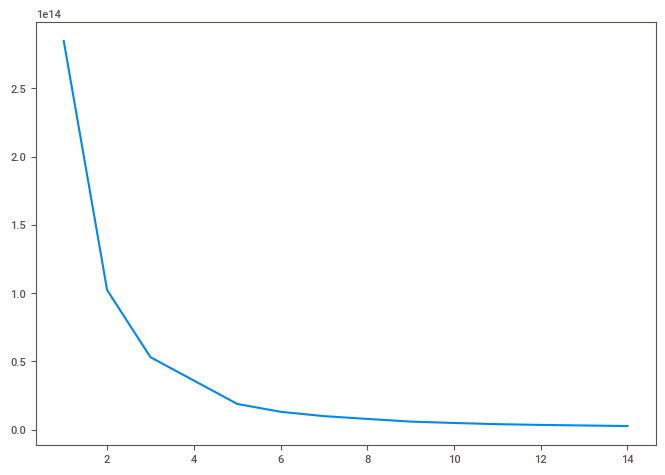

In [628]:
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

In [629]:
cluster_empr_22 = KMeans(n_clusters=3, random_state=42).fit(df_c_22)

In [630]:
cluster_empr_22.labels_

array([0, 0, 0, ..., 0, 0, 2])

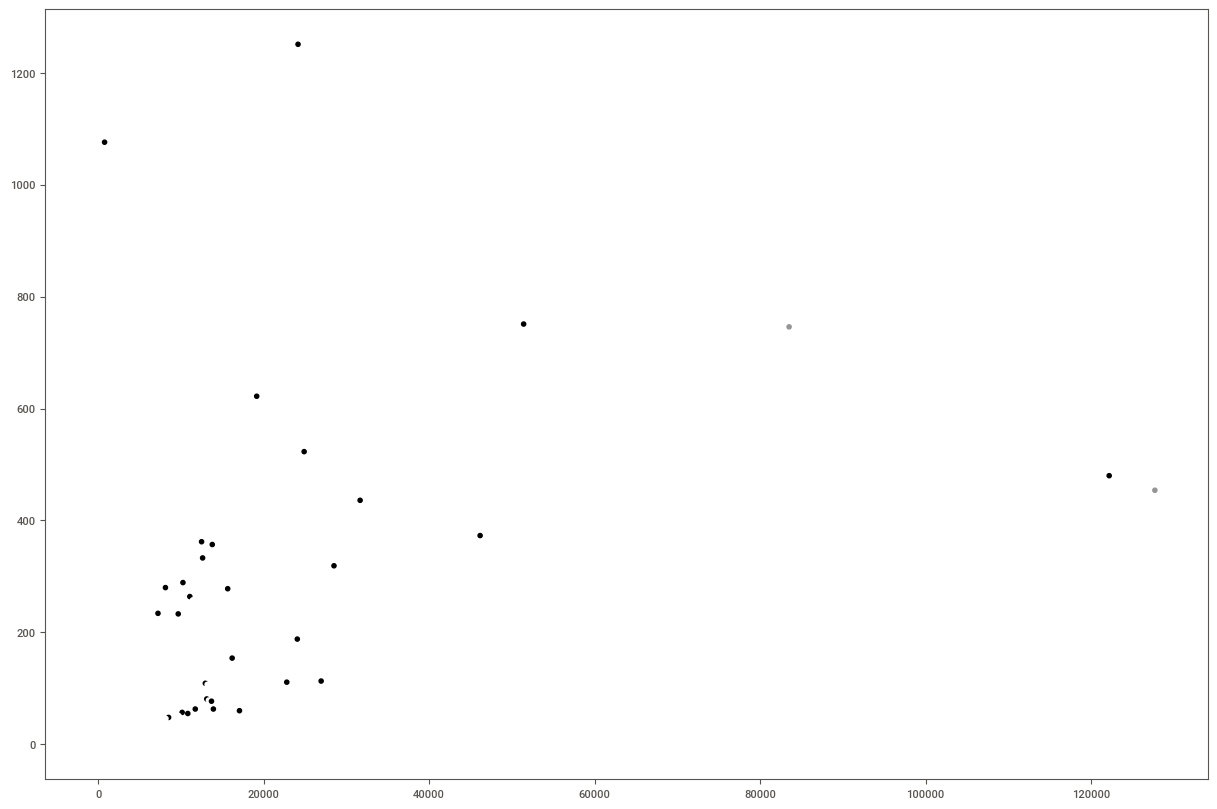

In [631]:
fig, ax = plt.subplots(figsize= (15,10))

ax.scatter(df_c_22.iloc[:,1], df_c_22.iloc[:,0], c = cluster_empr_22.labels_)

plt.show()

In [632]:
df_c_22['cluster'] = cluster_empr_22.labels_

In [633]:
df_c_22.head()

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110001                           8         926                      8   
110002                          38        2563                     21   
110003                           0         344                      5   
110004                          21        1971                     19   
110005                           3         591                      8   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110001                                     70                       2   
110002                                     93                      99   
110003                                     78                       0   
110004                                    105                     184   
110005                                    108                       4   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110001                                       30             497   
110002                                      342             474   
110003                                        0             477   
110004                                      422             489   
110005                                       35             479   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  \
cod_municipio_ibge                                                       
110001                         504               491               543   
110002                         495               484               518   
110003                         486               447               522   
110004                         505               490               533   
110005                         477               454               480   

                    media_NU_NOTA_REDACAO  valor_medio_recebido_familia  \
cod_municipio_ibge                                                        
110001                                621                         18495   
110002                                584                         17615   
110003                                471                         18956   
110004                                611                         19376   
110005                                576                         17752   

                    pib_per_capita_preco_corrente  perc_20_59_anos  pop_total  \
cod_municipio_ibge                                                              
110001                                      25091                0      22516   
110002                                      25730                0     111148   
110003                                      32226                0       5067   
110004                                      29331                0      86416   
110005                                      37069                0      16088   

                    total_sim_tecnologia  porte_municipio  \
cod_municipio_ibge                                          
110001                                18                2   
110002                                12                4   
110003                                 8                1   
110004                                17                3   
110005                                 8                2   

                    Mecanismos_incentivo_Sim  Reducao_IPTU_Sim  \
cod_municipio_ibge                                               
110001                                     0                 0   
110002                                     1                 1   
110003                                     1                 0   
110004                                     1                 0   
110005                                     1                 0   

                    Is

In [634]:
df_c_22= df_c_22.drop('porte_municipio', axis = 1)

In [635]:
col_empr = df['qtd_abertas_Empresario_Individual']
display(col_empr)
  
df_c_22 = df_c_22.join(col_empr )

cod_municipio_ibge
110001       194
110002      1275
110003        49
110004      1258
110005       257
110006       166
110007        86
110008       106
110009       319
110010       279
110011       617
110012      2148
110013       279
110014       113
110015       461
110018       574
110020      7893
110025       172
110026        23
110028       709
110029        33
110030      1580
110032       206
110033       184
110034       115
110037        61
110040       131
110045       283
110050        35
110060        16
110070        38
110080       204
110090        22
110092       104
110094       184
110100        29
110110        58
110120        29
110130        84
110140        62
110143        35
110145        35
110146        20
110147        13
110148        33
110149       134
110150        91
110155        21
110160        41
110170       117
110175        56
110180        21
120001        96
120005        51
120010       200
120013        50
120017        48
120020      

In [636]:
df_c_22.head()

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110001                           8         926                      8   
110002                          38        2563                     21   
110003                           0         344                      5   
110004                          21        1971                     19   
110005                           3         591                      8   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110001                                     70                       2   
110002                                     93                      99   
110003                                     78                       0   
110004                                    105                     184   
110005                                    108                       4   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110001                                       30             497   
110002                                      342             474   
110003                                        0             477   
110004                                      422             489   
110005                                       35             479   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  \
cod_municipio_ibge                                                       
110001                         504               491               543   
110002                         495               484               518   
110003                         486               447               522   
110004                         505               490               533   
110005                         477               454               480   

                    media_NU_NOTA_REDACAO  valor_medio_recebido_familia  \
cod_municipio_ibge                                                        
110001                                621                         18495   
110002                                584                         17615   
110003                                471                         18956   
110004                                611                         19376   
110005                                576                         17752   

                    pib_per_capita_preco_corrente  perc_20_59_anos  pop_total  \
cod_municipio_ibge                                                              
110001                                      25091                0      22516   
110002                                      25730                0     111148   
110003                                      32226                0       5067   
110004                                      29331                0      86416   
110005                                      37069                0      16088   

                    total_sim_tecnologia  Mecanismos_incentivo_Sim  \
cod_municipio_ibge                                                   
110001                                18                         0   
110002                                12                         1   
110003                                 8                         1   
110004                                17                         1   
110005                                 8                         1   

                    Reducao_IPTU_Sim  Isencao_IPTU_Sim  Reducao_ISSQN_Sim  \
cod_municipio_ibge                                                          
110001                             0                 0                  0   
110002                             1                 1                  0   
110003                             0                 0                  0   
110004                             0 

## Explorando os 2 Clusters

In [618]:
df_c_22['cluster'].value_counts()

0    5568
1       2
Name: cluster, dtype: int64

In [503]:
clust_2 = pd.merge(df_mun, df_c_22, on = "cod_municipio_ibge")
clust_2 = clust_2[['cod_municipio_ibge','SGUF','NMMUN','pop_total','cluster']]

In [504]:
clust_2_0 = clust_2.loc[clust_2['cluster'] == 0]
clust_2_0

cod_municipio_ibge SGUF                             NMMUN  pop_total  \
0                 110001   RO             Alta Floresta D'Oeste      22516   
1                 110002   RO                         Ariquemes     111148   
2                 110003   RO                            Cabixi       5067   
3                 110004   RO                            Cacoal      86416   
4                 110005   RO                        Cerejeiras      16088   
5                 110006   RO                 Colorado do Oeste      15213   
6                 110007   RO                        Corumbiara       7052   
7                 110008   RO                     Costa Marques      19255   
8                 110009   RO                   Espigão D'Oeste      33009   
9                 110010   RO                     Guajará-Mirim      46930   
10                110011   RO                              Jaru      51469   
11                110012   RO                         Ji-Paraná     131026   
12                110013   RO                Machadinho D'Oeste      41724   
13                110014   RO          Nova Brasilândia D'Oeste      20504   
14                110015   RO               Ouro Preto do Oeste      35445   
15                110018   RO                     Pimenta Bueno      37098   
16                110020   RO                       Porto Velho     548952   
17                110025   RO                 Presidente Médici      18165   
18                110026   RO                        Rio Crespo       3843   
19                110028   RO                    Rolim de Moura      55748   
20                110029   RO               Santa Luzia D'Oeste       5942   
21                110030   RO                           Vilhena     104517   
22                110032   RO             São Miguel do Guaporé      23147   
23                110033   RO                       Nova Mamoré      32184   
24                110034   RO                  Alvorada D'Oeste      13807   
25                110037   RO           Alto Alegre dos Parecis      13268   
26                110040   RO                      Alto Paraíso      22258   
27                110045   RO                           Buritis      41043   
28                110050   RO           Novo Horizonte do Oeste       8125   
29                110060   RO                       Cacaulândia       6307   
30                110070   RO            Campo Novo de Rondônia      14391   
31                110080   RO                Candeias do Jamari      28068   
32                110090   RO                      Castanheiras       2923   
33                110092   RO                       Chupinguaia      11755   
34                110094   RO                           Cujubim      27131   
35                110100   RO         Governador Jorge Teixeira       7130   
36                110110   RO                   Itapuã do Oeste      10819   
37                110120   RO                Ministro Andreazza       9461   
38                110130   RO                  Mirante da Serra      10691   
39                110140   RO                       Monte Negro      16158   
40                110143   RO                        Nova União       6822   
41                110145   RO                           Parecis       6319   
42                110146   RO              Pimenteiras do Oeste       2127   
43                110147   RO             Primavera de Rondônia       2697   
44                110148   RO                São Felipe D'Oeste       4962   
45                110149   RO          São Francisco do Guaporé      21088   
46                110150   RO                      Seringueiras      11846   
47                110155   RO                     Teixeirópolis       4160   
48                110160   RO                         Theobroma      10348   
49                110170   RO                             Urupá      11081   
50                110175   R

In [506]:
menor = clust_2_0['pop_total'].min()
menor

771

In [507]:
clust_2_1 = clust_2.loc[clust_2['cluster'] == 1]
clust_2_1

cod_municipio_ibge SGUF           NMMUN  pop_total  cluster
3242              330455   RJ  Rio de Janeiro    6775561        1
3829              355030   SP       São Paulo   12396372        1

In [508]:
menor = clust_2_1['pop_total'].min()
menor

6775561

## Explorando os 3 clusters

In [269]:
#report = sv.analyze(df_c_22)
#report.show_notebook()

In [637]:
df_c_22['cluster'].value_counts()

0    5537
2      31
1       2
Name: cluster, dtype: int64

In [638]:
clust_3 = pd.merge(df_mun, df_c_22, on = "cod_municipio_ibge")
clust_3 = clust_3 [['cod_municipio_ibge','SGUF','NMMUN','pop_total','cluster']]


In [639]:
clust_3_0 = clust_3.loc[clust_3['cluster'] == 0]
clust_3_0

cod_municipio_ibge SGUF                             NMMUN  pop_total  \
0                 110001   RO             Alta Floresta D'Oeste      22516   
1                 110002   RO                         Ariquemes     111148   
2                 110003   RO                            Cabixi       5067   
3                 110004   RO                            Cacoal      86416   
4                 110005   RO                        Cerejeiras      16088   
5                 110006   RO                 Colorado do Oeste      15213   
6                 110007   RO                        Corumbiara       7052   
7                 110008   RO                     Costa Marques      19255   
8                 110009   RO                   Espigão D'Oeste      33009   
9                 110010   RO                     Guajará-Mirim      46930   
10                110011   RO                              Jaru      51469   
11                110012   RO                         Ji-Paraná     131026   
12                110013   RO                Machadinho D'Oeste      41724   
13                110014   RO          Nova Brasilândia D'Oeste      20504   
14                110015   RO               Ouro Preto do Oeste      35445   
15                110018   RO                     Pimenta Bueno      37098   
16                110020   RO                       Porto Velho     548952   
17                110025   RO                 Presidente Médici      18165   
18                110026   RO                        Rio Crespo       3843   
19                110028   RO                    Rolim de Moura      55748   
20                110029   RO               Santa Luzia D'Oeste       5942   
21                110030   RO                           Vilhena     104517   
22                110032   RO             São Miguel do Guaporé      23147   
23                110033   RO                       Nova Mamoré      32184   
24                110034   RO                  Alvorada D'Oeste      13807   
25                110037   RO           Alto Alegre dos Parecis      13268   
26                110040   RO                      Alto Paraíso      22258   
27                110045   RO                           Buritis      41043   
28                110050   RO           Novo Horizonte do Oeste       8125   
29                110060   RO                       Cacaulândia       6307   
30                110070   RO            Campo Novo de Rondônia      14391   
31                110080   RO                Candeias do Jamari      28068   
32                110090   RO                      Castanheiras       2923   
33                110092   RO                       Chupinguaia      11755   
34                110094   RO                           Cujubim      27131   
35                110100   RO         Governador Jorge Teixeira       7130   
36                110110   RO                   Itapuã do Oeste      10819   
37                110120   RO                Ministro Andreazza       9461   
38                110130   RO                  Mirante da Serra      10691   
39                110140   RO                       Monte Negro      16158   
40                110143   RO                        Nova União       6822   
41                110145   RO                           Parecis       6319   
42                110146   RO              Pimenteiras do Oeste       2127   
43                110147   RO             Primavera de Rondônia       2697   
44                110148   RO                São Felipe D'Oeste       4962   
45                110149   RO          São Francisco do Guaporé      21088   
46                110150   RO                      Seringueiras      11846   
47                110155   RO                     Teixeirópolis       4160   
48                110160   RO                         Theobroma      10348   
49                110170   RO                             Urupá      11081   
50                110175   R

In [640]:
menor = clust_3_0['pop_total'].min()
menor

771

In [641]:
clust_3_1 = clust_3.loc[clust_3['cluster'] == 1]
clust_3_1

cod_municipio_ibge SGUF           NMMUN  pop_total  cluster
3242              330455   RJ  Rio de Janeiro    6775561        1
3829              355030   SP       São Paulo   12396372        1

In [479]:
menor = clust_3_1['pop_total'].min()
menor

6775561

In [642]:
clust_3_2 = clust_3.loc[clust_3['cluster'] == 2]
clust_3_2

cod_municipio_ibge SGUF                    NMMUN  pop_total  cluster
111               130260   AM                   Manaus    2255903        2
169               150140   PA                    Belém    1506420        2
635               211130   MA                 São Luís    1115932        2
882               221100   PI                 Teresina     871126        2
949               230440   CE                Fortaleza    2703391        2
1163              240810   RN                    Natal     896708        2
1337              250750   PB              João Pessoa     825796        2
1552              260790   PE  Jaboatão dos Guararapes     711330        2
1596              261160   PE                   Recife    1661017        2
1696              270430   AL                   Maceió    1031597        2
1754              280030   SE                  Aracaju     672614        2
2162              292740   BA                 Salvador    2900319        2
2309              310620   MG           Belo Horizonte    2530701        2
2448              311860   MG                 Contagem     673849        2
3067              317020   MG               Uberlândia     706597        2
3199              330170   RJ          Duque de Caxias     929449        2
3224              330350   RJ              Nova Iguaçu     825388        2
3247              330490   RJ              São Gonçalo    1098357        2
3375              350950   SP                 Campinas    1223237        2
3479              351880   SP                Guarulhos    1404694        2
3654              353440   SP                   Osasco     701428        2
3754              354340   SP           Ribeirão Preto     720116        2
3801              354780   SP              Santo André     723889        2
3811              354870   SP    São Bernardo do Campo     849874        2
3824              354990   SP      São José dos Campos     737310        2
3848              355220   SP                 Sorocaba     695328        2
4005              410690   PR                 Curitiba    1963726        2
4931              431490   RS             Porto Alegre    1492530        2
5122              500270   MS             Campo Grande     916001        2
5417              520870   GO                  Goiânia    1555626        2
5569              530010   DF                 Brasília    3094325        2

In [480]:
menor = clust_3_2['pop_total'].min()
menor

672614

In [458]:
#pd.set_option('display.max_columns', None)

In [221]:
clust = clust_3.loc[clust_3['SGUF'] == 'TO']
#clust = clust.loc[clust_3['cluster'] == 0]
clust 

cod_municipio_ibge SGUF          NMMUN  qtd_abertas  \
4398              420540   SC  Florianópolis        16744   

      qtd_abertas_Consórcio de Sociedades  qtd_abertas_Cooperativa  \
4398                                  9.0                     10.0   

      qtd_abertas_EIRELI  qtd_abertas_Empresa Pública  \
4398               118.0                          1.0   

      qtd_abertas_Empresario_Individual  \
4398                              12878   

      qtd_abertas_Estabelecimento, no Brasil, de Sociedade Estrangeira e Empresas Binacionais  \
4398                                                NaN                                         

      ...  pib_per_capita_preco_corrente  atividade_maior_valor_ad_bruto  \
4398  ...                       42719.93                 Demais serviços   

      perc_20_59_anos  perc_idosa  perc_masculino  perc_feminino  pop_total  \
4398         0.610024    0.160551        0.481759       0.518241     492977   

      porte_municipio  total_sim_tecnologia total_não_tecnologia  
4398                4                  14.0                 16.0  

[1 rows x 135 columns]

## Explorando 4 clusters

In [526]:
df_c_22['cluster'].value_counts()

0    5482
3      80
2       7
1       1
Name: cluster, dtype: int64

In [527]:
clust_4 = pd.merge(df_mun, df_c_22, on = "cod_municipio_ibge")
clust_4 = clust_4 [['cod_municipio_ibge','SGUF','NMMUN','pop_total','cluster']]

In [528]:
clust_4_0 = clust_4.loc[clust_4['cluster'] == 0]
clust_4_0

cod_municipio_ibge SGUF                             NMMUN  pop_total  \
0                 110001   RO             Alta Floresta D'Oeste      22516   
1                 110002   RO                         Ariquemes     111148   
2                 110003   RO                            Cabixi       5067   
3                 110004   RO                            Cacoal      86416   
4                 110005   RO                        Cerejeiras      16088   
5                 110006   RO                 Colorado do Oeste      15213   
6                 110007   RO                        Corumbiara       7052   
7                 110008   RO                     Costa Marques      19255   
8                 110009   RO                   Espigão D'Oeste      33009   
9                 110010   RO                     Guajará-Mirim      46930   
10                110011   RO                              Jaru      51469   
11                110012   RO                         Ji-Paraná     131026   
12                110013   RO                Machadinho D'Oeste      41724   
13                110014   RO          Nova Brasilândia D'Oeste      20504   
14                110015   RO               Ouro Preto do Oeste      35445   
15                110018   RO                     Pimenta Bueno      37098   
17                110025   RO                 Presidente Médici      18165   
18                110026   RO                        Rio Crespo       3843   
19                110028   RO                    Rolim de Moura      55748   
20                110029   RO               Santa Luzia D'Oeste       5942   
21                110030   RO                           Vilhena     104517   
22                110032   RO             São Miguel do Guaporé      23147   
23                110033   RO                       Nova Mamoré      32184   
24                110034   RO                  Alvorada D'Oeste      13807   
25                110037   RO           Alto Alegre dos Parecis      13268   
26                110040   RO                      Alto Paraíso      22258   
27                110045   RO                           Buritis      41043   
28                110050   RO           Novo Horizonte do Oeste       8125   
29                110060   RO                       Cacaulândia       6307   
30                110070   RO            Campo Novo de Rondônia      14391   
31                110080   RO                Candeias do Jamari      28068   
32                110090   RO                      Castanheiras       2923   
33                110092   RO                       Chupinguaia      11755   
34                110094   RO                           Cujubim      27131   
35                110100   RO         Governador Jorge Teixeira       7130   
36                110110   RO                   Itapuã do Oeste      10819   
37                110120   RO                Ministro Andreazza       9461   
38                110130   RO                  Mirante da Serra      10691   
39                110140   RO                       Monte Negro      16158   
40                110143   RO                        Nova União       6822   
41                110145   RO                           Parecis       6319   
42                110146   RO              Pimenteiras do Oeste       2127   
43                110147   RO             Primavera de Rondônia       2697   
44                110148   RO                São Felipe D'Oeste       4962   
45                110149   RO          São Francisco do Guaporé      21088   
46                110150   RO                      Seringueiras      11846   
47                110155   RO                     Teixeirópolis       4160   
48                110160   RO                         Theobroma      10348   
49                110170   RO                             Urupá      11081   
50                110175   RO                     Vale do Anari      11545   
51                110180   R

In [529]:
menor = clust_4_0['pop_total'].min()
menor

771

In [530]:
clust_4_1 = clust_4.loc[clust_4['cluster'] == 1]
clust_4_1

cod_municipio_ibge SGUF      NMMUN  pop_total  cluster
3829              355030   SP  São Paulo   12396372        1

In [531]:
menor = clust_4_1['pop_total'].min()
menor

12396372

In [532]:
clust_4_2 = clust_4.loc[clust_4['cluster'] == 2]
clust_4_2

cod_municipio_ibge SGUF           NMMUN  pop_total  cluster
111               130260   AM          Manaus    2255903        2
949               230440   CE       Fortaleza    2703391        2
2162              292740   BA        Salvador    2900319        2
2309              310620   MG  Belo Horizonte    2530701        2
3242              330455   RJ  Rio de Janeiro    6775561        2
4005              410690   PR        Curitiba    1963726        2
5569              530010   DF        Brasília    3094325        2

In [533]:
menor = clust_4_2['pop_total'].min()
menor

1963726

In [536]:
clust_4_3 = clust_4.loc[clust_4['cluster'] == 3]
clust_4_3

cod_municipio_ibge SGUF                    NMMUN  pop_total  cluster
16                110020   RO              Porto Velho     548952        3
66                120040   AC               Rio Branco     419452        3
138               140010   RR                Boa Vista     436591        3
160               150080   PA               Ananindeua     540410        3
169               150140   PA                    Belém    1506420        3
303               160030   AP                   Macapá     522357        3
635               211130   MA                 São Luís    1115932        3
882               221100   PI                 Teresina     871126        3
934               230370   CE                  Caucaia     368918        3
1163              240810   RN                    Natal     896708        3
1293              250400   PB           Campina Grande     413830        3
1337              250750   PB              João Pessoa     825796        3
1509              260410   PE                  Caruaru     369343        3
1552              260790   PE  Jaboatão dos Guararapes     711330        3
1575              260960   PE                   Olinda     393734        3
1586              261070   PE                 Paulista     336919        3
1590              261110   PE                Petrolina     359372        3
1596              261160   PE                   Recife    1661017        3
1696              270430   AL                   Maceió    1031597        3
1754              280030   SE                  Aracaju     672614        3
1957              291080   BA         Feira de Santana     624107        3
2239              293330   BA     Vitória da Conquista     343643        3
2315              310670   MG                    Betim     450024        3
2448              311860   MG                 Contagem     673849        3
2663              313670   MG             Juiz de Fora     577532        3
2743              314330   MG            Montes Claros     417478        3
2880              315460   MG       Ribeirão das Neves     341415        3
3066              317010   MG                  Uberaba     340277        3
3067              317020   MG               Uberlândia     706597        3
3113              320130   ES                Cariacica     386495        3
3166              320500   ES                    Serra     536765        3
3173              320520   ES               Vila Velha     508655        3
3174              320530   ES                  Vitória     369534        3
3183              330045   RJ             Belford Roxo     515239        3
3191              330100   RJ    Campos dos Goytacazes     514643        3
3199              330170   RJ          Duque de Caxias     929449        3
3222              330330   RJ                  Niterói     516981        3
3224              330350   RJ              Nova Iguaçu     825388        3
3247              330490   RJ              São Gonçalo    1098357        3
3249              330510   RJ       São João de Meriti     473385        3
3334              350600   SP                    Bauru     381706        3
3375              350950   SP                 Campinas    1223237        3
3388              351060   SP              Carapicuíba     405375        3
3419              351380   SP                  Diadema     429550        3
3452              351620   SP                   Franca     358539        3
3478              351870   SP                  Guarujá     324977        3
3479              351880   SP                Guarulhos    1404694        3
3531              352310   SP          Itaquaquecetuba     379082        3
3560              352590   SP                  Jundiaí     426935        3
3597              352940   SP                     Mauá     481725        3
3610              353060   SP          Mogi das Cruzes     455587        3
3654              353440   SP                   Osasco     701428        3
3700              353870   SP  

In [537]:
menor = clust_4_3['pop_total'].min()
menor

320820

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

## Treinando o modelo com Cluster

### 2022

In [97]:
df_c_22.head()

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110001                           8         926                      8   
110002                          38        2563                     21   
110003                           0         344                      5   
110004                          21        1971                     19   
110005                           3         591                      8   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110001                                     70                       2   
110002                                     93                      99   
110003                                     78                       0   
110004                                    105                     184   
110005                                    108                       4   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110001                                       30             497   
110002                                      342             474   
110003                                        0             477   
110004                                      422             489   
110005                                       35             479   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
110001                         504               491               543  ...   
110002                         495               484               518  ...   
110003                         486               447               522  ...   
110004                         505               490               533  ...   
110005                         477               454               480  ...   

                    Isencao_Tx_Sim  Cessao_terrenos_Sim  Doacao_terrenos_Sim  \
cod_municipio_ibge                                                             
110001                           0                    0                    0   
110002                           1                    0                    1   
110003                           0                    0                    0   
110004                           1                    1                    1   
110005                           0                    0                    0   

                    Outros_mecanismos_Sim  ISH_Baixa  ISH_Máxima  ISH_Média  \
cod_municipio_ibge                                                            
110001                                  0          0           0          0   
110002                                  1          0           0          1   
110003                                  1          0           0          0   
110004                                  0          0           0          0   
110005                                  0          1           0          0   

                    ISH_Mínima  cluster  qtd_abertas_Empresario_Individual  
cod_municipio_ibge                                                          
110001                       0        0                                194  
110002                       0        0                               1275  
110003                       0        0                                 49  
110004                       0        0                               1258  
110005                       0        0                                257  

[5 rows x 31 columns]

In [98]:
#df_c_22 = pd.get_dummies(df_c_22, columns = ['cluster']) #drop_first=True

In [ ]:
h = FeatureHasher(n_features=4)
f = h.transform(df_c_22['cluster'])
f.toarray()

In [99]:
df_c_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 110001 to 530010
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   taxa_homicidio                     5570 non-null   int64
 1   RH_adm_dir                         5570 non-null   int64
 2   densidade_banda_larga              5570 non-null   int64
 3   densidade_telefonia_movel          5570 non-null   int64
 4   qtd_cursos_engenharias             5570 non-null   int64
 5   qtd_cursos_negocios_direito        5570 non-null   int64
 6   media_notas_CN                     5570 non-null   int64
 7   media_notas_CH                     5570 non-null   int64
 8   media_NU_NOTA_LC                   5570 non-null   int64
 9   media_NU_NOTA_MT                   5570 non-null   int64
 10  media_NU_NOTA_REDACAO              5570 non-null   int64
 11  valor_medio_recebido_familia       5570 non-null   int64
 12  pib_per_capit

In [118]:
treino_clus = df_c_22.groupby('cluster', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state = 123))

teste_clus = df_c_22.drop(treino_clus.index)

print(treino_clus.shape, teste_clus.shape)

(4178, 31) (1392, 31)


In [119]:
treino_clus = pd.get_dummies(treino_clus, columns = ['cluster'], drop_first=True)
teste_clus = pd.get_dummies(teste_clus, columns = ['cluster'], drop_first=True)

In [120]:
teste_clus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 110003 to 530010
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   taxa_homicidio                 1392 non-null   int64
 1   RH_adm_dir                     1392 non-null   int64
 2   densidade_banda_larga          1392 non-null   int64
 3   densidade_telefonia_movel      1392 non-null   int64
 4   qtd_cursos_engenharias         1392 non-null   int64
 5   qtd_cursos_negocios_direito    1392 non-null   int64
 6   media_notas_CN                 1392 non-null   int64
 7   media_notas_CH                 1392 non-null   int64
 8   media_NU_NOTA_LC               1392 non-null   int64
 9   media_NU_NOTA_MT               1392 non-null   int64
 10  media_NU_NOTA_REDACAO          1392 non-null   int64
 11  valor_medio_recebido_familia   1392 non-null   int64
 12  pib_per_capita_preco_corrente  1392 non-null   int64
 13  perc_20_59_

In [121]:
treino_clus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4178 entries, 430420 to 354780
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   taxa_homicidio                 4178 non-null   int64
 1   RH_adm_dir                     4178 non-null   int64
 2   densidade_banda_larga          4178 non-null   int64
 3   densidade_telefonia_movel      4178 non-null   int64
 4   qtd_cursos_engenharias         4178 non-null   int64
 5   qtd_cursos_negocios_direito    4178 non-null   int64
 6   media_notas_CN                 4178 non-null   int64
 7   media_notas_CH                 4178 non-null   int64
 8   media_NU_NOTA_LC               4178 non-null   int64
 9   media_NU_NOTA_MT               4178 non-null   int64
 10  media_NU_NOTA_REDACAO          4178 non-null   int64
 11  valor_medio_recebido_familia   4178 non-null   int64
 12  pib_per_capita_preco_corrente  4178 non-null   int64
 13  perc_20_59_

### Pycaret

#### RMSE

In [189]:
regression_setup_rmse = setup(data = treino_clus, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

In [190]:
best_model_clus = compare_models(sort = 'RMSE', fold=5)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [191]:
print(best_model_clus)

HuberRegressor()


In [192]:
best_model_clus = create_model('huber', fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [193]:
tuned_clus = tune_model(best_model_clus, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [194]:
print(tuned_clus)

HuberRegressor(alpha=0.7, epsilon=1.5)


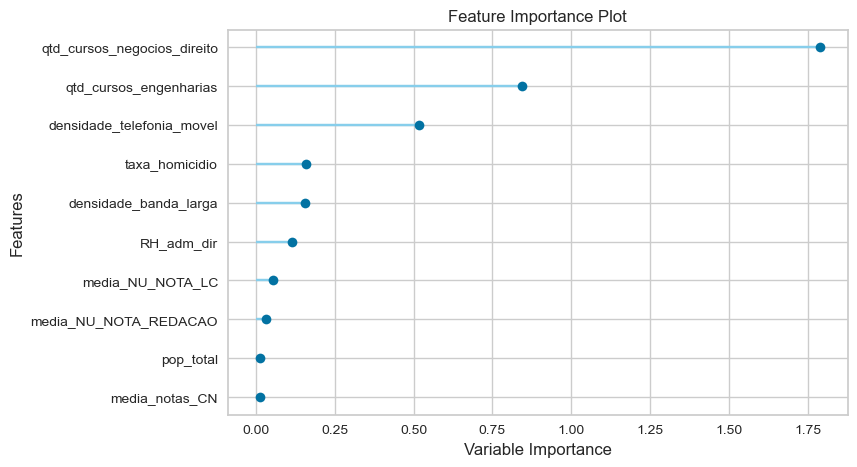

In [195]:
plot_model(tuned_clus, plot='feature')

In [196]:
final_model_baseline_rmse_clus = finalize_model(tuned_clus)

### Previsão - RMSE 2022

In [197]:
pred_teste_clus = predict_model(final_model_baseline_rmse_clus, data = teste_clus)

In [198]:
pred_teste_clus

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110003                           0         344                      5   
110004                          21        1971                     19   
110009                           7         893                     10   
110015                           6        1425                     12   
110020                         145       12963                     23   
...                            ...         ...                    ...   
522040                           3        1064                     17   
522150                           3         296                      1   
522157                           0         209                      3   
522160                          15        1180                     12   
522220                           0         403                      1   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110003                                     78                       0   
110004                                    105                     184   
110009                                     60                       0   
110015                                    111                      18   
110020                                    106                     424   
...                                       ...                     ...   
522040                                     84                       0   
522150                                     87                       0   
522157                                     81                       0   
522160                                    112                      50   
522220                                     66                       0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110003                                        0             477   
110004                                      422             489   
110009                                       22             461   
110015                                       60             458   
110020                                     1595             473   
...                                         ...             ...   
522040                                       13             454   
522150                                        0             418   
522157                                        0             430   
522160                                      146             477   
522220                                        0             431   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
110003                         486               447               522  ...   
110004                         505               490               533  ...   
110009                         469               466               502  ...   
110015                         476               470               507  ...   
110020                         496               482               511  ...   
...                            ...               ...               ...  ...   
522040                         472               466               498  ...   
522150                         419               414               436  ...   
522157                         435               486               514  ...   
522160                         502               493               523  ...   
522220                         443               426               445  ...   

                    Doacao_terrenos_Sim  Outros_mecanismos_Sim  ISH_Baixa  \
cod_municipio_ibge                                                          
110003                                0                      1    

Text(0, 0.5, 'Valores preditos')

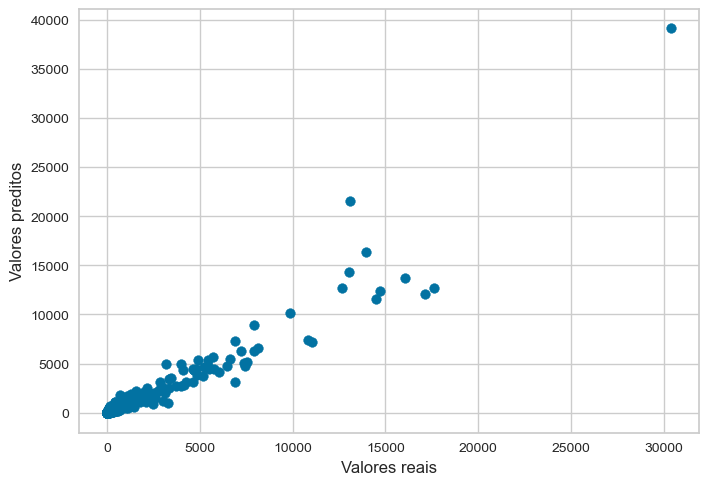

In [199]:
plt.scatter(pred_teste_clus['qtd_abertas_Empresario_Individual'],pred_teste_clus['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2022.png')

### Previsão - RMSE 2019

In [200]:
df_c_19 = pd.get_dummies(df_c_19, columns = ['cluster'], drop_first=True)

In [205]:
pred_2018_2019_clus = predict_model(final_model_baseline_rmse_clus, data = df_c_19)

In [207]:
pred_2018_2019_clus

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110001                           7         926                      5   
110002                          41        2563                     11   
110003                           0         344                      3   
110004                          17        1971                     12   
110005                           2         591                      7   
...                            ...         ...                    ...   
522200                           2         528                      7   
522205                           4         394                      8   
522220                           3         403                      5   
522230                           2         344                      2   
530010                         530      122197                     23   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110001                                     34                       6   
110002                                     86                      42   
110003                                     79                       0   
110004                                     89                     202   
110005                                     89                       0   
...                                       ...                     ...   
522200                                     33                       0   
522205                                     78                       0   
522220                                      5                       0   
522230                                     26                       0   
530010                                    117                    3082   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110001                                       23             480   
110002                                      299             481   
110003                                        0             442   
110004                                      469             484   
110005                                       38             466   
...                                         ...             ...   
522200                                        0             474   
522205                                        0             439   
522220                                        0             440   
522230                                        0             451   
530010                                    15811             510   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
110001                         543               495               502  ...   
110002                         549               513               512  ...   
110003                         506               466               484  ...   
110004                         549               513               524  ...   
110005                         551               498               493  ...   
...                            ...               ...               ...  ...   
522200                         522               493               503  ...   
522205                         498               463               479  ...   
522220                         513               450               504  ...   
522230                         498               463               471  ...   
530010                         580               546               552  ...   

                    Doacao_terrenos_Sim  Outros_mecanismos_Sim  ISH_Baixa  \
cod_municipio_ibge                                                          
110001                                0                      0    

Text(0, 0.5, 'Valores preditos')

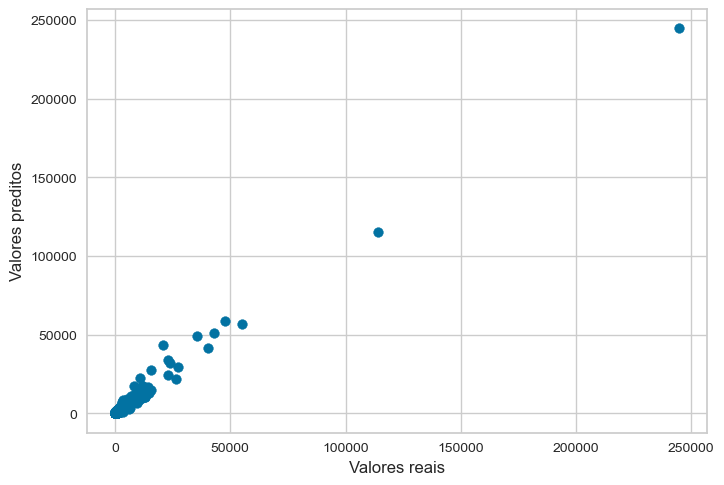

In [208]:
plt.scatter(pred_2018_2019_clus['qtd_abertas_Empresario_Individual'],pred_2018_2019_clus['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

### MAPE

In [209]:
regression_setup = setup(data = treino_clus, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

In [210]:
best_model_clus = compare_models(sort = 'MAPE', fold=5)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [215]:
print(best_model_clus)

RandomForestRegressor(n_jobs=-1, random_state=42)


In [216]:
best_model_clus = create_model('rf', fold = 5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [213]:
tuned_clus = tune_model(best_model_clus, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [214]:
print(tuned_clus)

RandomForestRegressor(n_jobs=-1, random_state=42)


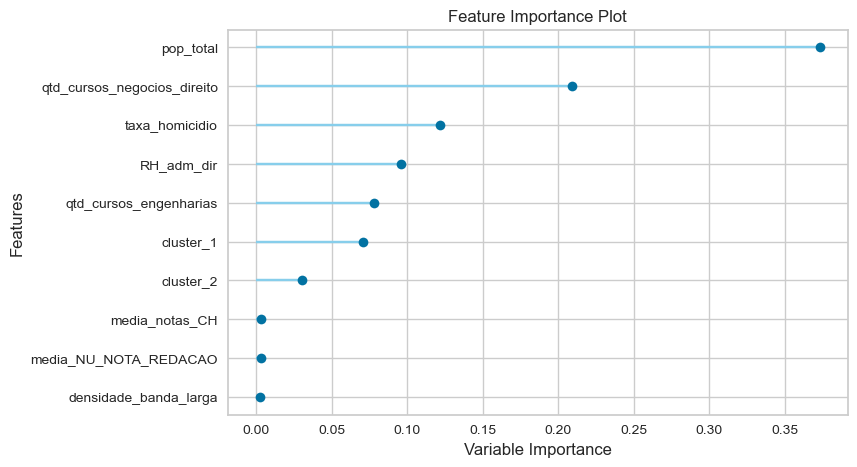

In [217]:
plot_model(best_model_clus, plot='feature')

In [218]:
final_model_baseline_mape_clus = finalize_model(best_model_clus)

### Previsão - Mape 2022

In [219]:
pred_teste_clus = predict_model(final_model_baseline_mape_clus, data = teste_clus)

In [220]:
pred_teste_clus

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110003                           0         344                      5   
110004                          21        1971                     19   
110009                           7         893                     10   
110015                           6        1425                     12   
110020                         145       12963                     23   
...                            ...         ...                    ...   
522040                           3        1064                     17   
522150                           3         296                      1   
522157                           0         209                      3   
522160                          15        1180                     12   
522220                           0         403                      1   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110003                                     78                       0   
110004                                    105                     184   
110009                                     60                       0   
110015                                    111                      18   
110020                                    106                     424   
...                                       ...                     ...   
522040                                     84                       0   
522150                                     87                       0   
522157                                     81                       0   
522160                                    112                      50   
522220                                     66                       0   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110003                                        0             477   
110004                                      422             489   
110009                                       22             461   
110015                                       60             458   
110020                                     1595             473   
...                                         ...             ...   
522040                                       13             454   
522150                                        0             418   
522157                                        0             430   
522160                                      146             477   
522220                                        0             431   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
110003                         486               447               522  ...   
110004                         505               490               533  ...   
110009                         469               466               502  ...   
110015                         476               470               507  ...   
110020                         496               482               511  ...   
...                            ...               ...               ...  ...   
522040                         472               466               498  ...   
522150                         419               414               436  ...   
522157                         435               486               514  ...   
522160                         502               493               523  ...   
522220                         443               426               445  ...   

                    Doacao_terrenos_Sim  Outros_mecanismos_Sim  ISH_Baixa  \
cod_municipio_ibge                                                          
110003                                0                      1    

Text(0, 0.5, 'Valores preditos')

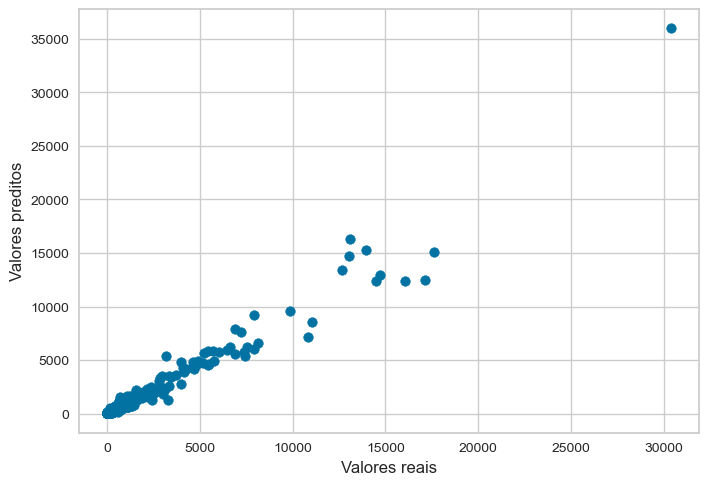

In [221]:
plt.scatter(pred_teste_clus['qtd_abertas_Empresario_Individual'],pred_teste_clus['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2022.png')

### Previsão - Mape 2019

In [222]:
pred_2018_2019_clus = predict_model(final_model_baseline_mape_clus, data = df_c_19)

In [223]:
pred_2018_2019_clus

taxa_homicidio  RH_adm_dir  densidade_banda_larga  \
cod_municipio_ibge                                                      
110001                           7         926                      5   
110002                          41        2563                     11   
110003                           0         344                      3   
110004                          17        1971                     12   
110005                           2         591                      7   
...                            ...         ...                    ...   
522200                           2         528                      7   
522205                           4         394                      8   
522220                           3         403                      5   
522230                           2         344                      2   
530010                         530      122197                     23   

                    densidade_telefonia_movel  qtd_cursos_engenharias  \
cod_municipio_ibge                                                      
110001                                     34                       6   
110002                                     86                      42   
110003                                     79                       0   
110004                                     89                     202   
110005                                     89                       0   
...                                       ...                     ...   
522200                                     33                       0   
522205                                     78                       0   
522220                                      5                       0   
522230                                     26                       0   
530010                                    117                    3082   

                    qtd_cursos_negocios_direito  media_notas_CN  \
cod_municipio_ibge                                                
110001                                       23             480   
110002                                      299             481   
110003                                        0             442   
110004                                      469             484   
110005                                       38             466   
...                                         ...             ...   
522200                                        0             474   
522205                                        0             439   
522220                                        0             440   
522230                                        0             451   
530010                                    15811             510   

                    media_notas_CH  media_NU_NOTA_LC  media_NU_NOTA_MT  ...  \
cod_municipio_ibge                                                      ...   
110001                         543               495               502  ...   
110002                         549               513               512  ...   
110003                         506               466               484  ...   
110004                         549               513               524  ...   
110005                         551               498               493  ...   
...                            ...               ...               ...  ...   
522200                         522               493               503  ...   
522205                         498               463               479  ...   
522220                         513               450               504  ...   
522230                         498               463               471  ...   
530010                         580               546               552  ...   

                    Doacao_terrenos_Sim  Outros_mecanismos_Sim  ISH_Baixa  \
cod_municipio_ibge                                                          
110001                                0                      0    

Text(0, 0.5, 'Valores preditos')

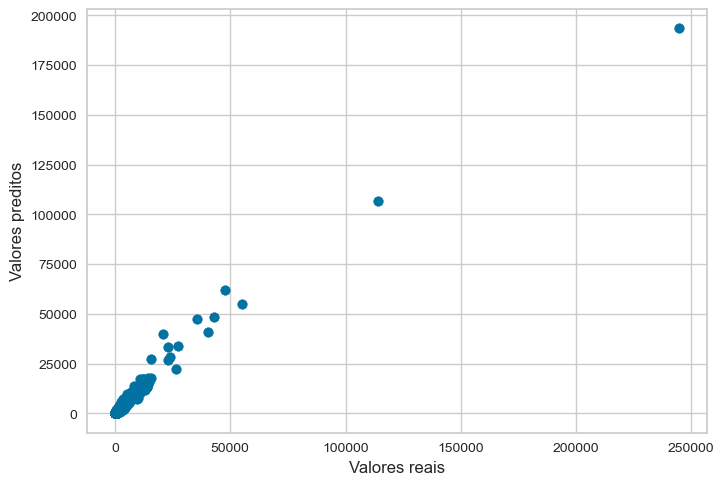

In [224]:
plt.scatter(pred_2018_2019_clus['qtd_abertas_Empresario_Individual'],pred_2018_2019_clus['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')